In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CIFAR 10 DATASET

In [ ]:
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
print(len(training_images))
print(len(test_images))

50000
10000


In [ ]:
training_images = training_images.reshape(50000, 1024, 3)
training_images = training_images[0:10000]
training_labels = training_labels[0:10000]
training_images = training_images/255.0
test_images = test_images.reshape(10000, 1024, 3)
test_images = test_images[0:5000]
test_labels = test_labels[0:5000]
test_images = test_images/255.0

In [ ]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(1024,3), return_sequences=True)),
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')
	])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, batch_size = 50, epochs=10)

Epoch 1/10
200/200 [==============================] - 123s 557ms/step - loss: 2.1137 - accuracy: 0.1966
Epoch 2/10
200/200 [==============================] - 112s 558ms/step - loss: 2.0086 - accuracy: 0.2529
Epoch 3/10
200/200 [==============================] - 111s 557ms/step - loss: 2.0085 - accuracy: 0.2645
Epoch 4/10
200/200 [==============================] - 112s 558ms/step - loss: 1.9649 - accuracy: 0.2771
Epoch 5/10
200/200 [==============================] - 111s 557ms/step - loss: 1.9583 - accuracy: 0.2816
Epoch 6/10
200/200 [==============================] - 111s 557ms/step - loss: 1.9388 - accuracy: 0.2896
Epoch 7/10
200/200 [==============================] - 111s 557ms/step - loss: 1.9371 - accuracy: 0.2899
Epoch 8/10
200/200 [==============================] - 111s 556ms/step - loss: 1.9254 - accuracy: 0.2989
Epoch 9/10
200/200 [==============================] - 111s 557ms/step - loss: 1.9188 - accuracy: 0.2966
Epoch 10/10
200/200 [==============================] - 111s 556m

In [ ]:
model.evaluate(test_images, test_labels)

157/157 [==============================] - 38s 225ms/step - loss: 1.9601 - accuracy: 0.2912


[1.9600898027420044, 0.29120001196861267]

# MNIST DATASET

In [ ]:
import torch

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)


In [ ]:
print(train_data)


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)


Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
print(train_data.data.size())


torch.Size([60000, 28, 28])


In [ ]:
print(train_data.targets.size())


torch.Size([60000])


In [ ]:
print(train_data.data[0])


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

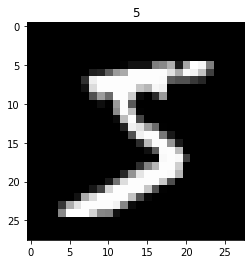

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()


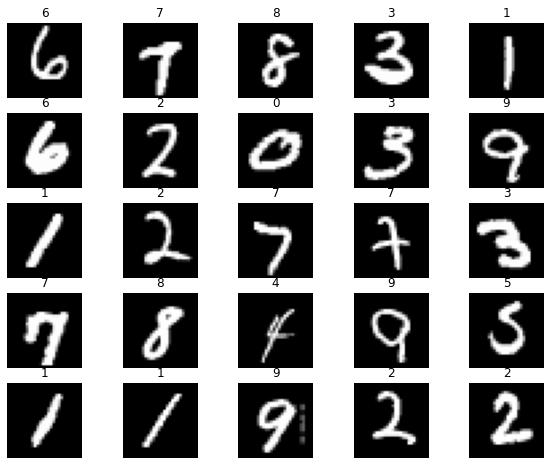

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7fae59428850>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7fae59449e10>}

In [ ]:
from torch import nn
import torch.nn.functional as F


In [ ]:
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01


In [ ]:
class RNN(nn.Module):
    pass
model = RNN().to(device)
print(model)


RNN()


In [ ]:
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        pass
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # Passing in the input and hidden state into the model and  obtaining outputs
        out, hidden = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        #Reshaping the outputs such that it can be fit into the fully connected layer
        out = self.fc(out[:, -1, :])
        return out
       
        pass
pass
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
print(model)


RNN(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [ ]:
def train(num_epochs, model, loaders):
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            images = images.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = loss_func(outputs, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
        pass
    pass
train(num_epochs, model, loaders)

Epoch [1/2], Step [100/600], Loss: 0.6104
Epoch [1/2], Step [200/600], Loss: 0.2625
Epoch [1/2], Step [300/600], Loss: 0.1447
Epoch [1/2], Step [400/600], Loss: 0.2647
Epoch [1/2], Step [500/600], Loss: 0.1042
Epoch [1/2], Step [600/600], Loss: 0.0769
Epoch [2/2], Step [100/600], Loss: 0.0376
Epoch [2/2], Step [200/600], Loss: 0.0225
Epoch [2/2], Step [300/600], Loss: 0.0473
Epoch [2/2], Step [400/600], Loss: 0.0719
Epoch [2/2], Step [500/600], Loss: 0.1155
Epoch [2/2], Step [600/600], Loss: 0.1507


In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders['test']:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 97.77 %


# SAVEE Dataset

In [ ]:
!unzip "/content/drive/MyDrive/SaveeDataset.zip"

In [ ]:
import librosa
import numpy as np

input_length = 16000*5

batch_size = 32

n_mels = 320

def preprocess_audio_mel_T(audio, sample_rate=16000, window_size=20, #log_specgram
                 step_size=10, eps=1e-10):

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels= n_mels)
    mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40

    return mel_db.T


def load_audio_file(file_path, input_length=input_length):
  data = librosa.core.load(file_path, sr=16000)[0] #, sr=16000
  if len(data)>input_length:
    max_offset = len(data)-input_length
    
    offset = np.random.randint(max_offset)
    
    data = data[offset:(input_length+offset)]
            
  else:
    if input_length > len(data):
      max_offset = input_length - len(data)

      offset = np.random.randint(max_offset)
    else:
      offset = 0
    data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
    
  data = preprocess_audio_mel_T(data)
  return data

In [ ]:
# Preprocessing the dataset
import os
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import numpy as np
import cv2

rootDirectory = "/content/AudioData/"
personNames = ["DC","JE","JK","KL"]

classes = ["a" , "d" , "f", "h", "n", "sa" , "su" ]

X = list()
y = list()

for person in personNames:
  directory = os.path.join(rootDirectory,person)
  for filename in os.listdir(directory):
    filePath = os.path.join(directory, filename)
    data = load_audio_file(file_path=filePath)
    # data = cv2.merge([a,a,a])
    if(filename[0:1] in classes):
      X.append(data)
      y.append(classes.index(filename[0:1]))
    elif(filename[0:2] in classes):
      X.append(data)
      y.append(classes.index(filename[0:2]))

In [ ]:
X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)

In [ ]:
X.shape , y.shape

((480, 157, 320), (480,))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# dataset preparation

from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size= 0.6 ,random_state=10)

In [ ]:
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(157,320), return_sequences=True)),
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')
	])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size = 50, epochs=50)

Epoch 1/50
6/6 [==============================] - 9s 127ms/step - loss: 2.1944 - accuracy: 0.1910
Epoch 2/50
6/6 [==============================] - 1s 126ms/step - loss: 2.0548 - accuracy: 0.2431
Epoch 3/50
6/6 [==============================] - 1s 126ms/step - loss: 1.9929 - accuracy: 0.2431
Epoch 4/50
6/6 [==============================] - 1s 127ms/step - loss: 1.9573 - accuracy: 0.2431
Epoch 5/50
6/6 [==============================] - 1s 129ms/step - loss: 1.9331 - accuracy: 0.2431
Epoch 6/50
6/6 [==============================] - 1s 127ms/step - loss: 1.9149 - accuracy: 0.2500
Epoch 7/50
6/6 [==============================] - 1s 130ms/step - loss: 1.9023 - accuracy: 0.2465
Epoch 8/50
6/6 [==============================] - 1s 125ms/step - loss: 1.9052 - accuracy: 0.2569
Epoch 9/50
6/6 [==============================] - 1s 127ms/step - loss: 1.8863 - accuracy: 0.2535
Epoch 10/50
6/6 [==============================] - 1s 125ms/step - loss: 1.8672 - accuracy: 0.2847
Epoch 11/50
6/6 [==

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 2s 57ms/step - loss: 1.4087 - accuracy: 0.4323


[1.408677577972412, 0.4322916567325592]

# EmoDB Dataset

In [ ]:
!unzip "/content/drive/MyDrive/EmoDB.zip"

In [ ]:
import librosa
import numpy as np

input_length = 16000*5

batch_size = 32

n_mels = 320

def preprocess_audio_mel_T(audio, sample_rate=16000, window_size=20, #log_specgram
                 step_size=10, eps=1e-10):

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels= n_mels)
    mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40

    return mel_db.T


def load_audio_file(file_path, input_length=input_length):
  data = librosa.core.load(file_path, sr=16000)[0] #, sr=16000
  if len(data)>input_length:
    max_offset = len(data)-input_length
    
    offset = np.random.randint(max_offset)
    
    data = data[offset:(input_length+offset)]
            
  else:
    if input_length > len(data):
      max_offset = input_length - len(data)

      offset = np.random.randint(max_offset)
    else:
      offset = 0
    data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
    
  data = preprocess_audio_mel_T(data)
  return data

In [ ]:
# Preprocessing the dataset
import os
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import numpy as np
import cv2

directory = "/content/wav/"

classes = ["W" ,"L" ,"E" ,"A" , "F" ,"T" ,"N" ]

X = list()
y = list()

for filename in os.listdir(directory):
  filePath = os.path.join(directory, filename)
  data = load_audio_file(file_path=filePath)
  if(filename[5:6] in classes):
    X.append(data)
    y.append(classes.index(filename[5:6]))

In [ ]:
X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# dataset preparation

from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size= 0.7 ,random_state=10)

In [ ]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(157,320), return_sequences=True)),
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')
	])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size = 50, epochs=50)

Epoch 1/50
8/8 [==============================] - 10s 130ms/step - loss: 2.1718 - accuracy: 0.1631
Epoch 2/50
8/8 [==============================] - 1s 130ms/step - loss: 2.0208 - accuracy: 0.1898
Epoch 3/50
8/8 [==============================] - 1s 130ms/step - loss: 1.9197 - accuracy: 0.2540
Epoch 4/50
8/8 [==============================] - 1s 127ms/step - loss: 1.8459 - accuracy: 0.2701
Epoch 5/50
8/8 [==============================] - 1s 130ms/step - loss: 1.7682 - accuracy: 0.3289
Epoch 6/50
8/8 [==============================] - 1s 127ms/step - loss: 1.6464 - accuracy: 0.4439
Epoch 7/50
8/8 [==============================] - 1s 129ms/step - loss: 1.5401 - accuracy: 0.4064
Epoch 8/50
8/8 [==============================] - 1s 127ms/step - loss: 1.4142 - accuracy: 0.4171
Epoch 9/50
8/8 [==============================] - 1s 132ms/step - loss: 1.3430 - accuracy: 0.4866
Epoch 10/50
8/8 [==============================] - 1s 131ms/step - loss: 1.2661 - accuracy: 0.5107
Epoch 11/50
8/8 [=

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 2s 54ms/step - loss: 1.7593 - accuracy: 0.5590


[1.7592660188674927, 0.5590062141418457]